In [23]:
import csv
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from neupy import algorithms
from numpy import interp
from scipy import interpolate
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
random_state = np.random.RandomState(5)
inputSize = 210
outputCol = inputSize + 1

# 10 Fold Part
print('\nk-fold Cross-Validation')
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
dataset = np.genfromtxt("./Anticancer.csv", delimiter=",", dtype=float)
X = dataset[:, 0:inputSize]
Y = dataset[:, inputSize:outputCol]
std_scale = StandardScaler().fit(X)
X = std_scale.transform(X)
cvscores = []
shape_X=X.shape
shape_Y=Y.shape
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))


k-fold Cross-Validation
The shape of X is: (1144, 210)
The shape of Y is: (1144, 1)


In [4]:
#std_scale = StandardScaler().fit(X)
##X = np.array(X, dtype='float64')
#X = std_scale.transform(X)
#X = X[:, ~np.isnan(X).any(axis=0)]          # i change its status to activate
#pca = PCA(n_components=2)     # i change its status to activate
#pca.fit(X)                                   # i change its status to activate
#X = pca.transform(X)                          # i change its status to activate
#X.shape
#shape_X=X.shape
#shape_Y=Y.shape
#print ('The shape of X is: ' + str(shape_X))
#print ('The shape of Y is: ' + str(shape_Y))

#print ('The shape of X is: ' + str(shape_X))

# Classification 

In [5]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10, shuffle=True)
#classifier = BernoulliNB()
 #clf = algorithms.PNN(std=10, verbose=False)
# classifier = AdaBoostClassifier(n_estimators=100)
#classifier = SVC(kernel='linear', probability=True)
#classifier = KNeighborsClassifier(n_neighbors=150)
#clf = RandomForestClassifier(n_estimators=3, oob_score=True, random_state=29, warm_start=False)
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(9#, 2), random_state=1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)


# Independent testing Using SVM

c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


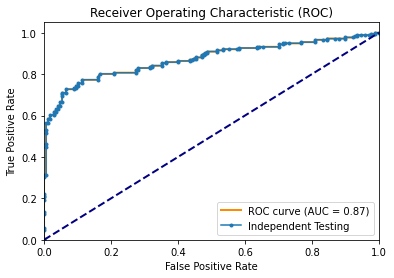


Training set confusion matrix:
True Negative = 368, False Positive = 36, False Negative = 94, True Positive = 302
Accuracy = 0.84, Sensitivity = 0.76, Specificity = 0.91, Precision = 0.89, MCC = 0.68

Testing set confusion matrix:
True Negative = 151, False Positive = 17, False Negative = 43, True Positive = 133
Accuracy = 0.83, Sensitivity = 0.76, Specificity = 0.90, Precision = 0.89, MCC = 0.66


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import math
import csv

# Assuming X and Y are your data and labels respectively

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train SVM model
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_pca, y_train)

# Predict on training data
y_pred_train = svm.predict(X_train_pca)

# Calculate confusion matrix and metrics for training data
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train, labels=[0, 1]).ravel()
acc_train = (tp + tn) / (tp + tn + fp + fn)
sn_train = tp / (tp + fn)
sp_train = tn / (tn + fp)
prec_train = tp / (tp + fp)
mcc_train = (tp * tn - fp * fn) / math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# Predict on testing data
y_pred_test = svm.predict(X_test_pca)

# Calculate confusion matrix and metrics for testing data
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test, labels=[0, 1]).ravel()
acc_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)
sn_test = tp_test / (tp_test + fn_test)
sp_test = tn_test / (tn_test + fp_test)
prec_test = tp_test / (tp_test + fp_test)
mcc_test = (tp_test * tn_test - fp_test * fn_test) / math.sqrt((tp_test + fp_test) * (tp_test + fn_test) * (tn_test + fp_test) * (tn_test + fn_test))

# Calculate ROC curve and AUC for testing data
probs = svm.predict_proba(X_test_pca)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, marker='.', label='Independent Testing')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

plt.show()

# Print metrics
print("\nTraining set confusion matrix:")
print(f"True Negative = {tn}, False Positive = {fp}, False Negative = {fn}, True Positive = {tp}")
print(f"Accuracy = {acc_train:.2f}, Sensitivity = {sn_train:.2f}, Specificity = {sp_train:.2f}, Precision = {prec_train:.2f}, MCC = {mcc_train:.2f}")

print("\nTesting set confusion matrix:")
print(f"True Negative = {tn_test}, False Positive = {fp_test}, False Negative = {fn_test}, True Positive = {tp_test}")
print(f"Accuracy = {acc_test:.2f}, Sensitivity = {sn_test:.2f}, Specificity = {sp_test:.2f}, Precision = {prec_test:.2f}, MCC = {mcc_test:.2f}")


# Confusion Matrix with SVM

c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


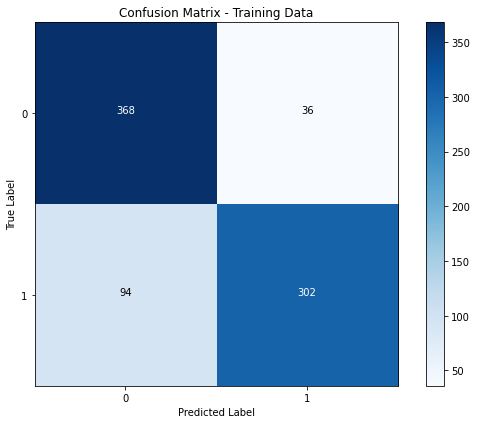

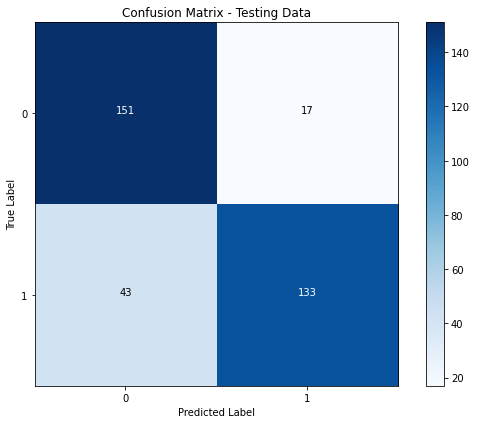


Training set confusion matrix:
True Negative = 368, False Positive = 36, False Negative = 94, True Positive = 302
Accuracy = 0.84, Sensitivity = 0.76, Specificity = 0.91, Precision = 0.89, MCC = 0.68

Testing set confusion matrix:
True Negative = 151, False Positive = 17, False Negative = 43, True Positive = 133
Accuracy = 0.83, Sensitivity = 0.76, Specificity = 0.90, Precision = 0.89, MCC = 0.66


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import math

# Assuming X and Y are your data and labels respectively
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train SVM model
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_pca, y_train)

# Predict on training data
y_pred_train = svm.predict(X_train_pca)

# Calculate confusion matrix and metrics for training data
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train, labels=[0, 1]).ravel()
acc_train = (tp + tn) / (tp + tn + fp + fn)
sn_train = tp / (tp + fn)
sp_train = tn / (tn + fp)
prec_train = tp / (tp + fp)
mcc_train = (tp * tn - fp * fn) / math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# Predict on testing data
y_pred_test = svm.predict(X_test_pca)

# Calculate confusion matrix and metrics for testing data
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test, labels=[0, 1]).ravel()
acc_test = (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)
sn_test = tp_test / (tp_test + fn_test)
sp_test = tn_test / (tn_test + fp_test)
prec_test = tp_test / (tp_test + fp_test)
mcc_test = (tp_test * tn_test - fp_test * fn_test) / math.sqrt((tp_test + fp_test) * (tp_test + fn_test) * (tn_test + fp_test) * (tn_test + fn_test))

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
cm_train = confusion_matrix(y_train, y_pred_train, labels=[0, 1])
plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Training Data')
plt.colorbar()
tick_marks = np.arange(len([0, 1]))
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

# Add numerical values in each cell
thresh = cm_train.max() / 2.
for i, j in np.ndindex(cm_train.shape):
    plt.text(j, i, format(cm_train[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm_train[i, j] > thresh else "black")

plt.show()

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
cm_test = confusion_matrix(y_test, y_pred_test, labels=[0, 1])
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Testing Data')
plt.colorbar()
tick_marks = np.arange(len([0, 1]))
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

# Add numerical values in each cell
thresh = cm_test.max() / 2.
for i, j in np.ndindex(cm_test.shape):
    plt.text(j, i, format(cm_test[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm_test[i, j] > thresh else "black")

plt.show()

# Print metrics
print("\nTraining set confusion matrix:")
print(f"True Negative = {tn}, False Positive = {fp}, False Negative = {fn}, True Positive = {tp}")
print(f"Accuracy = {acc_train:.2f}, Sensitivity = {sn_train:.2f}, Specificity = {sp_train:.2f}, Precision = {prec_train:.2f}, MCC = {mcc_train:.2f}")

print("\nTesting set confusion matrix:")
print(f"True Negative = {tn_test}, False Positive = {fp_test}, False Negative = {fn_test}, True Positive = {tp_test}")
print(f"Accuracy = {acc_test:.2f}, Sensitivity = {sn_test:.2f}, Specificity = {sp_test:.2f}, Precision = {prec_test:.2f}, MCC = {mcc_test:.2f}")


 # Independent Testing Using RF

In [ ]:
from sklearn.model_selection import train_test_split
print('\nIndependent testing')
# resultwriter.writerow(['\n\rindependent testing'])
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
# train dataset
print("training dataset 70%")
print(X_train.shape, y_train.shape)

# test dataset
print("testing dataset 30%")
print(X_test.shape, y_test.shape)
# train the model
std_scale = StandardScaler().fit(X_train)
X_train = np.array(X_train, dtype='float32')
X_train = std_scale.transform(X_train)
# X_train = std_scale.transform(X_train)
# X_train = np.array(X_train,dtype='float32')
X_train = X_train[:, ~np.isnan(X_train).any(axis=0)]
pca = PCA(n_components=2)
pca.fit(X_train)
X_train = pca.transform(X_train)
clf = RandomForestClassifier(n_estimators=25, max_depth=16, oob_score=True, n_jobs=-1, warm_start=True).fit(X_train, y_train.ravel())
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1).fit(X_train, y_train.ravel()) 
pred = np.round(clf.predict(X_train)) #clf
tn, fp, fn, tp = confusion_matrix(y_train, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sn=np.round(tp/(tp+fn))
sp=np.round(tn/(tn+fp))
prec=np.round(tp/(tp+fp))
mcc=np.round((tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fn)*(tn+fn))))
print("\nIndependent training data set confusion matrix")
print(
    (['True Negative =', tn, 'False Positive =', fp, 'False Negative =', fn, 'True Positive =', tp, 'Accuracy =', acc]))
print(
    (['Accuracy =', acc, 'Sensitivity =', sn, 'Precession =', prec, 'MCC =', mcc]))
# now test the model
std_scale = StandardScaler().fit(X_test)
X_test = std_scale.transform(X_test)
pca = PCA(n_components=2)
pca.fit(X_test)
X_test = pca.transform(X_test)
clf = RandomForestClassifier(n_estimators=25, max_depth=12, oob_score=True, n_jobs=-1, warm_start=True).fit(X_test, y_test.ravel())
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1).fit(X_test, y_test.ravel())
pred_test = np.round(clf.predict(X_test)) # clf
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, pred_test, labels=[1, 0]).ravel()
acc1 = np.round(((tn1 + tp1) / (tn1 + fp1 + fn1 + tp1)) * 100, 2)
sn1=np.round(tp1/(tp1+fn1))
sp1=np.round(tn/(tn1+fp1))
prec1=np.round(tp1/(tp1+fp1))
mcc1=np.round((tp1*tn1-fp1*fn1)/(math.sqrt((tp1+fp1)*(tp1+fn1)*(tn1+fn1)*(tn1+fn1))))
print("\nIndependent testing  data set confusion matrix")
print((['True Negative =', tn1, 'False Positive =', fp1, 'False Negative =', fn1, 'True Positive =', tp1, 'Accuracy =',
        acc1]))
print(
    (['Accuracy =', acc1, 'Sensitivity =', sn1, 'Precession =', prec1, 'MCC =', mcc1]))
with open('./result2.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['Independent testing'])
    resultwriter.writerow(['training dataset 70%'])
    resultwriter.writerow([X_train.shape, y_train.shape])
    resultwriter.writerow(['testing dataset 30%'])
    resultwriter.writerow([X_test.shape, y_test.shape])
    resultwriter.writerow(["training data set confusion matrix"])
    resultwriter.writerow((
                          ['True Negative =', tn, 'False Positive =', fp, 'False Negative =', fn, 'True Positive =', tp,
                           'Accuracy =', acc]))
    resultwriter.writerow((['testing  data set confusion matrix']))
    resultwriter.writerow((['True Negative =', tn1, 'False Positive =', fp1, 'False Negative =', fn1, 'True Positive =',
                            tp1, 'Accuracy =', acc1]))

from matplotlib import pyplot

ns_probs1 = [0 for _ in range(len(y_test))]
lr_probs1 = clf.predict_proba(X_test) #clf
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]

# calculate roc curves
ns_fpr3, ns_tpr3, _ = roc_curve(y_test, ns_probs1)
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs1)

# plot the roc curve for the model
pyplot.plot(ns_fpr3, ns_tpr3, linestyle='--')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', label='Independent Testing')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


# Confusion Matrix Using Random Forest

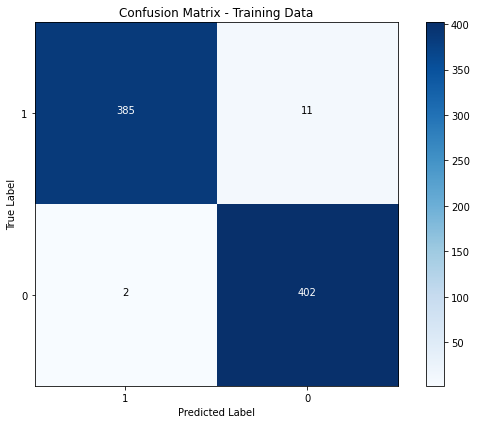

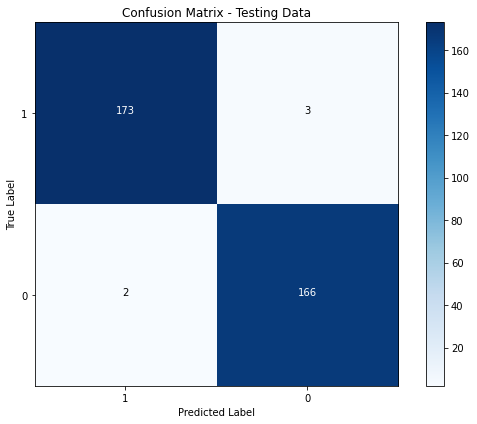


Training set confusion matrix:
True Negative = 385, False Positive = 11, False Negative = 2, True Positive = 402
Accuracy = 98.38, Sensitivity = 1.0, Specificity = 0.97, Precision = 0.97, MCC = 0.98

Testing set confusion matrix:
True Negative = 173, False Positive = 3, False Negative = 2, True Positive = 166
Accuracy = 98.55, Sensitivity = 0.99, Specificity = 0.98, Precision = 0.98, MCC = 0.97


ValueError: X has 210 features, but DecisionTreeClassifier is expecting 2 features as input.

<Figure size 432x288 with 0 Axes>

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import math
import csv

# Assuming X and Y are your data and labels respectively

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Random Forest model on training data
clf_train = RandomForestClassifier(n_estimators=25, max_depth=16, oob_score=True, n_jobs=-1, warm_start=True)
clf_train.fit(X_train_pca, y_train.ravel())

# Predict on training data
y_pred_train = np.round(clf_train.predict(X_train_pca))

# Calculate confusion matrix and metrics for training data
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_pred_train, labels=[1, 0]).ravel()
acc_train = np.round(((tp_train + tn_train) / (tp_train + tn_train + fp_train + fn_train)) * 100, 2)
sn_train = np.round(tp_train / (tp_train + fn_train), 2)
sp_train = np.round(tn_train / (tn_train + fp_train), 2)
prec_train = np.round(tp_train / (tp_train + fp_train), 2)
mcc_train = np.round((tp_train * tn_train - fp_train * fn_train) / math.sqrt((tp_train + fp_train) * (tp_train + fn_train) * (tn_train + fn_train) * (tn_train + fn_train)), 2)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
cm_train = confusion_matrix(y_train, y_pred_train, labels=[1, 0])
plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Training Data')
plt.colorbar()
tick_marks = np.arange(len([1, 0]))
plt.xticks(tick_marks, [1, 0])
plt.yticks(tick_marks, [1, 0])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

# Add numerical values in each cell
thresh = cm_train.max() / 2.
for i, j in np.ndindex(cm_train.shape):
    plt.text(j, i, format(cm_train[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm_train[i, j] > thresh else "black")

plt.show()

# Train Random Forest model on testing data
clf_test = RandomForestClassifier(n_estimators=25, max_depth=12, oob_score=True, n_jobs=-1, warm_start=True)
clf_test.fit(X_test_pca, y_test.ravel())

# Predict on testing data
y_pred_test = np.round(clf_test.predict(X_test_pca))

# Calculate confusion matrix and metrics for testing data
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test, labels=[1, 0]).ravel()
acc_test = np.round(((tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test)) * 100, 2)
sn_test = np.round(tp_test / (tp_test + fn_test), 2)
sp_test = np.round(tn_test / (tn_test + fp_test), 2)
prec_test = np.round(tp_test / (tp_test + fp_test), 2)
mcc_test = np.round((tp_test * tn_test - fp_test * fn_test) / math.sqrt((tp_test + fp_test) * (tp_test + fn_test) * (tn_test + fn_test) * (tn_test + fn_test)), 2)

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
cm_test = confusion_matrix(y_test, y_pred_test, labels=[1, 0])
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Testing Data')
plt.colorbar()
tick_marks = np.arange(len([1, 0]))
plt.xticks(tick_marks, [1, 0])
plt.yticks(tick_marks, [1, 0])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

# Add numerical values in each cell
thresh = cm_test.max() / 2.
for i, j in np.ndindex(cm_test.shape):
    plt.text(j, i, format(cm_test[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm_test[i, j] > thresh else "black")

plt.show()

# Print metrics
print("\nTraining set confusion matrix:")
print(f"True Negative = {tn_train}, False Positive = {fp_train}, False Negative = {fn_train}, True Positive = {tp_train}")
print(f"Accuracy = {acc_train}, Sensitivity = {sn_train}, Specificity = {sp_train}, Precision = {prec_train}, MCC = {mcc_train}")

print("\nTesting set confusion matrix:")
print(f"True Negative = {tn_test}, False Positive = {fp_test}, False Negative = {fn_test}, True Positive = {tp_test}")
print(f"Accuracy = {acc_test}, Sensitivity = {sn_test}, Specificity = {sp_test}, Precision = {prec_test}, MCC = {mcc_test}")

# Writing results to a CSV file
with open('./result2.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['Independent testing'])
    resultwriter.writerow(['Training Dataset 70%'])
    resultwriter.writerow([X_train.shape, y_train.shape])
    resultwriter.writerow(['Testing Dataset 30%'])
    resultwriter.writerow([X_test.shape, y_test.shape])
    resultwriter.writerow(["Training Data Set Confusion Matrix"])
    resultwriter.writerow(['True Negative =', tn_train, 'False Positive =', fp_train, 'False Negative =', fn_train, 'True Positive =', tp_train, 'Accuracy =', acc_train])
    resultwriter.writerow(["Testing Data Set Confusion Matrix"])
    resultwriter.writerow(['True Negative =', tn_test, 'False Positive =', fp_test, 'False Negative =', fn_test, 'True Positive =', tp_test, 'Accuracy =', acc_test])

# Plot ROC curve for testing data
plt.figure()
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = clf_test.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Independent Testing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# K fold Validation using RF

In [ ]:
# 10 Fold Part
print('\nk-fold Cross-Validation')
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
dataset = np.genfromtxt("./Anticancer.csv", delimiter=",", dtype=float)
X = dataset[:, 0:inputSize]
Y = dataset[:, inputSize:outputCol]
std_scale = StandardScaler().fit(X)
X = std_scale.transform(X)
cvscores = []

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
#cv = StratifiedKFold(n_splits=10, shuffle=True)
# classifier = BernoulliNB()
# classifier = algorithms.PNN(std=10, verbose=False)
# classifier = AdaBoostClassifier(n_estimators=100)
# classifier = SVC(kernel='linear', probability=True)
#classifier = KNeighborsClassifier(n_neighbors=500)
classifier = RandomForestClassifier(n_estimators=25, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    print('Fold : ' + str(i))
    classifier.fit(X[train], Y[train].ravel())
    pred = np.round(classifier.predict(X[test]))
    tp, fn, fp, tn = confusion_matrix(Y[test], pred, labels=[1, 0]).ravel()
    acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
    sp = np.round((tn / (fp + tn)) * 100, 2)
    sn = np.round((tp / (tp + fn)) * 100, 2)
    mcc = np.round(matthews_corrcoef(Y[test].ravel(), pred), 5)
    cvscores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
    print([tp, fp, tn, fn, acc, sp, sn, mcc])
    probas_ = classifier.predict_proba(X[test])
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = metrics.roc_curve(Y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.2,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')



plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Curve')
plt.legend(loc="lower right")
# plt.legend('')
plt.show()

print('\n\nResults are Saved in Cross-Validation-Results-5.csv')
with open('./Cross-Validation-Results.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['10-Fold Cross-Validation'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    for i in range(cvscores.__len__()):
        resultwriter.writerow(cvscores[i])


Confusion Matrix RF K-fold

Fold 1
Fold 2
Fold 3


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Fold 4
Fold 5


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Fold 6
Fold 7


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Fold 8
Fold 9


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Fold 10


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


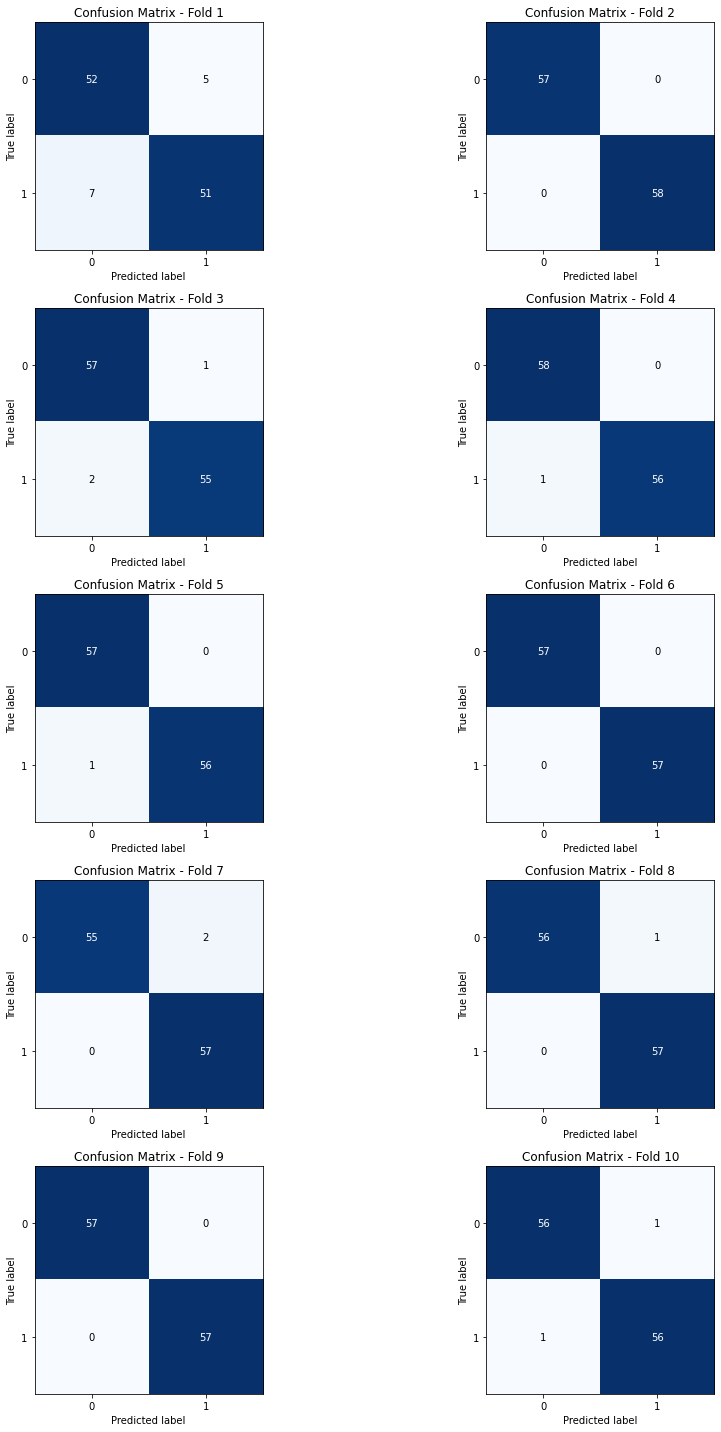

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import matthews_corrcoef
import csv

# Load dataset (adjust path and data loading as per your dataset)
dataset = np.genfromtxt("./Anticancer.csv", delimiter=",", dtype=float)
X = dataset[:, 0:inputSize]  # Adjust inputSize as per your dataset
Y = dataset[:, inputSize:outputCol]  # Adjust outputCol as per your dataset

# Standardize data
std_scale = StandardScaler().fit(X)
X = std_scale.transform(X)

# Define 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True)

# Initialize classifier
classifier = RandomForestClassifier(n_estimators=25, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)

# Initialize lists to store results
cvscores = []

# Initialize plot for confusion matrix
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
axs = axs.flatten()

# Iterate over folds
for i, (train, test) in enumerate(cv.split(X, Y)):
    print(f'Fold {i + 1}')

    # Train classifier
    classifier.fit(X[train], Y[train].ravel())

    # Predict on test set
    pred = np.round(classifier.predict(X[test]))

    # Calculate confusion matrix metrics
    tp, fn, fp, tn = confusion_matrix(Y[test], pred, labels=[1, 0]).ravel()
    acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
    sp = np.round((tn / (fp + tn)) * 100, 2)
    sn = np.round((tp / (tp + fn)) * 100, 2)
    mcc = np.round(matthews_corrcoef(Y[test].ravel(), pred), 5)

    # Store metrics
    cvscores.append([tp, fp, tn, fn, acc, sp, sn, mcc])

    # Compute Confusion Matrix
    cm = confusion_matrix(Y[test], pred)

    # Plot Confusion Matrix
    im = axs[i].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    axs[i].set(xticks=np.arange(cm.shape[1]),
               yticks=np.arange(cm.shape[0]),
               title=f'Confusion Matrix - Fold {i + 1}',
               ylabel='True label',
               xlabel='Predicted label')

    # Add text annotations to each cell
    thresh = cm.max() / 2.
    for x in range(cm.shape[0]):
        for y in range(cm.shape[1]):
            axs[i].text(y, x, format(cm[x, y], 'd'),
                        ha="center", va="center",
                        color="white" if cm[x, y] > thresh else "black")

# Adjust layout
plt.tight_layout()



# Show plot
plt.show()


Fold 1
Fold 2
Fold 3


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Fold 4
Fold 5


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Fold 6
Fold 7


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Fold 8
Fold 9


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


Fold 10

Results saved in Cross-Validation-Results.csv


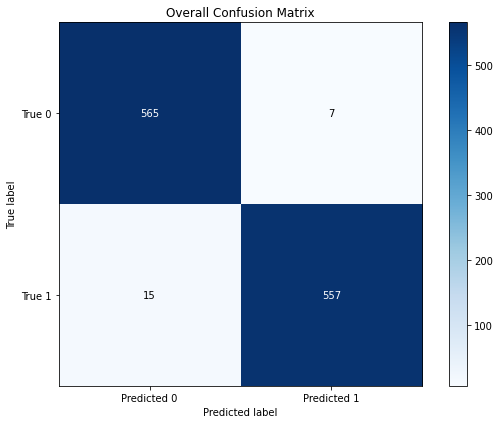

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import matthews_corrcoef
import csv

# Load dataset (adjust path and data loading as per your dataset)
dataset = np.genfromtxt("./Anticancer.csv", delimiter=",", dtype=float)
X = dataset[:, 0:inputSize]  # Adjust inputSize as per your dataset
Y = dataset[:, inputSize:outputCol]  # Adjust outputCol as per your dataset

# Standardize data
std_scale = StandardScaler().fit(X)
X = std_scale.transform(X)

# Define 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True)

# Initialize classifier
classifier = RandomForestClassifier(n_estimators=25, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)

# Initialize lists to store results
cvscores = []
all_predictions = []
all_true_labels = []

# Iterate over folds
for i, (train, test) in enumerate(cv.split(X, Y)):
    print(f'Fold {i + 1}')

    # Train classifier
    classifier.fit(X[train], Y[train].ravel())

    # Predict on test set
    pred = np.round(classifier.predict(X[test]))

    # Store predictions and true labels
    all_predictions.extend(pred)
    all_true_labels.extend(Y[test])

    # Calculate confusion matrix metrics
    tp, fn, fp, tn = confusion_matrix(Y[test], pred, labels=[1, 0]).ravel()
    acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
    sp = np.round((tn / (fp + tn)) * 100, 2)
    sn = np.round((tp / (tp + fn)) * 100, 2)
    mcc = np.round(matthews_corrcoef(Y[test].ravel(), pred), 5)

    # Store metrics
    cvscores.append([tp, fp, tn, fn, acc, sp, sn, mcc])

# Compute overall confusion matrix
overall_cm = confusion_matrix(all_true_labels, all_predictions)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
plt.imshow(overall_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Overall Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(all_true_labels)))
plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
plt.yticks(tick_marks, ['True 0', 'True 1'])

# Add text annotations to each cell
thresh = overall_cm.max() / 2.
for i, j in np.ndindex(overall_cm.shape):
    plt.text(j, i, format(overall_cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if overall_cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Save results to CSV file
print('\nResults saved in Cross-Validation-Results.csv')
with open('./Cross-Validation-Results.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['Overall Confusion Matrix'])
    resultwriter.writerow(['True Negative', 'False Positive', 'False Negative', 'True Positive'])
    resultwriter.writerow(overall_cm.ravel())

# Show plot
plt.show()


K fold using SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, matthews_corrcoef
import csv

# Load dataset (adjust this part according to your specific dataset loading method)
dataset = np.genfromtxt("./Anticancer.csv", delimiter=",", dtype=float)
X = dataset[:, 0:inputSize]  # Assuming inputSize is defined
Y = dataset[:, inputSize:outputCol]  # Assuming outputCol is defined

# Standardize the data
std_scale = StandardScaler().fit(X)
X = std_scale.transform(X)

# Initialize classifier with parameters
# classifier = RandomForestClassifier(n_estimators=25, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)
classifier = SVC(kernel='linear', probability=True)

# Perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True)
cvscores = []

plt.figure(figsize=(8, 6))

# Initialize lists to store ROC curve data
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, Y):
    print('Fold : ' + str(i))
    classifier.fit(X[train], Y[train].ravel())
    pred = np.round(classifier.predict(X[test]))
    tp, fn, fp, tn = confusion_matrix(Y[test], pred, labels=[1, 0]).ravel()
    acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
    sp = np.round((tn / (fp + tn)) * 100, 2)
    sn = np.round((tp / (tp + fn)) * 100, 2)
    mcc = np.round(matthews_corrcoef(Y[test].ravel(), pred), 5)
    cvscores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
    print([tp, fp, tn, fn, acc, sp, sn, mcc])
    
    # Calculate ROC curve and AUC
    probas_ = classifier.predict_proba(X[test])
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    # Plot ROC curve for current fold
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    i += 1

# Plot the mean ROC curve across all folds
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

# Plot luck line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8)

# Plot standard deviation area
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

# Customize plot
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - 10-Fold Cross-Validation')
plt.legend(loc="lower right")
plt.show()

# Save results to CSV file
print('\n\nResults are saved in Cross-Validation-Results.csv')
with open('./Cross-Validation-Results.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['10-Fold Cross-Validation'])
    resultwriter.writerow(['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity', 'MCC'])
    for score in cvscores:
        resultwriter.writerow(score)


# Confusion Matrix Uisng SVM all folds

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10


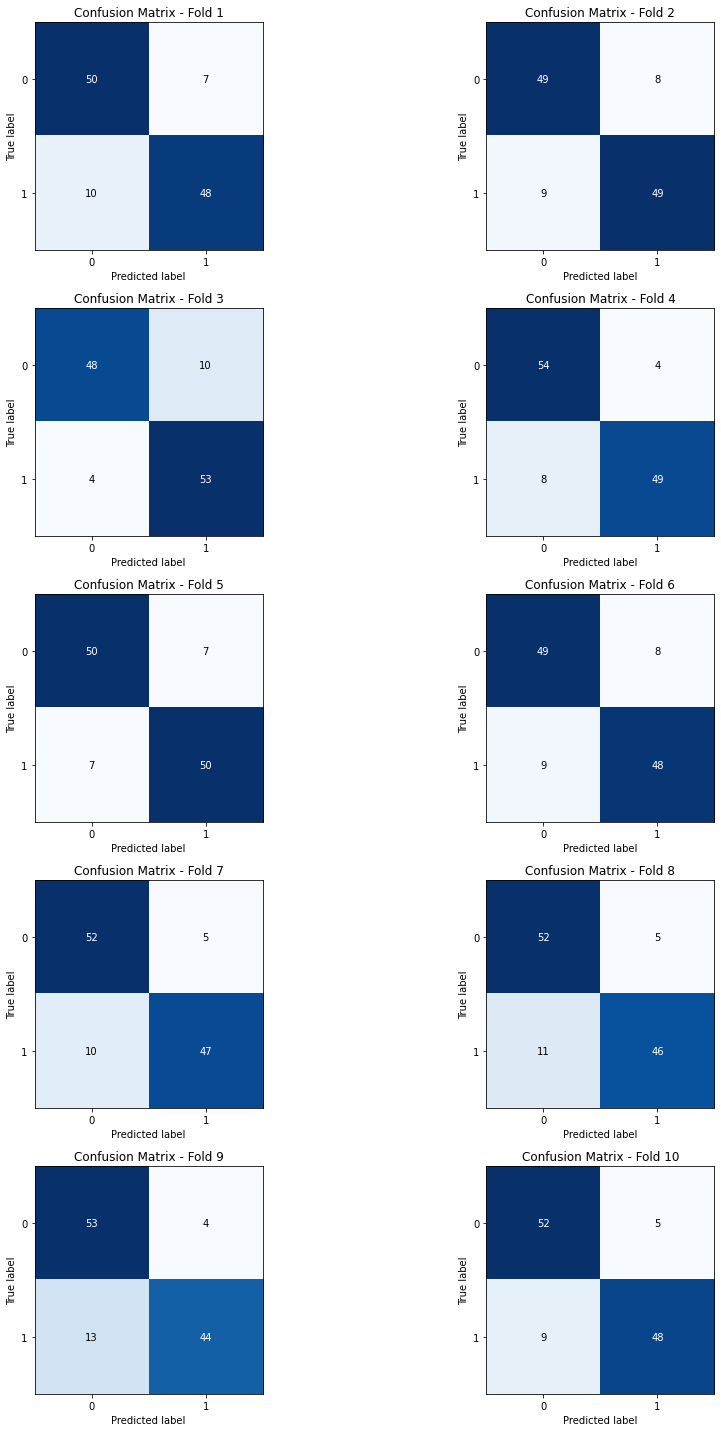

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import matthews_corrcoef
import csv

# Load dataset (adjust path and data loading as per your dataset)
dataset = np.genfromtxt("./Anticancer.csv", delimiter=",", dtype=float)
X = dataset[:, 0:inputSize]  # Adjust inputSize as per your dataset
Y = dataset[:, inputSize:outputCol]  # Adjust outputCol as per your dataset

# Standardize data
std_scale = StandardScaler().fit(X)
X = std_scale.transform(X)

# Define 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True)

# Initialize classifier (SVM)
classifier = SVC(kernel='linear', probability=True)

# Initialize lists to store results
cvscores = []

# Initialize plot for confusion matrix
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
axs = axs.flatten()

# Iterate over folds
for i, (train, test) in enumerate(cv.split(X, Y)):
    print(f'Fold {i + 1}')

    # Train classifier
    classifier.fit(X[train], Y[train].ravel())

    # Predict on test set
    pred = classifier.predict(X[test])

    # Calculate confusion matrix metrics
    tp, fn, fp, tn = confusion_matrix(Y[test], pred, labels=[1, 0]).ravel()
    acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
    sp = np.round((tn / (fp + tn)) * 100, 2)
    sn = np.round((tp / (tp + fn)) * 100, 2)
    mcc = np.round(matthews_corrcoef(Y[test].ravel(), pred), 5)

    # Store metrics
    cvscores.append([tp, fp, tn, fn, acc, sp, sn, mcc])

    # Compute Confusion Matrix
    cm = confusion_matrix(Y[test], pred)

    # Plot Confusion Matrix
    im = axs[i].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    axs[i].set(xticks=np.arange(cm.shape[1]),
               yticks=np.arange(cm.shape[0]),
               title=f'Confusion Matrix - Fold {i + 1}',
               ylabel='True label',
               xlabel='Predicted label')

    # Add text annotations to each cell
    thresh = cm.max() / 2.
    for x in range(cm.shape[0]):
        for y in range(cm.shape[1]):
            axs[i].text(y, x, format(cm[x, y], 'd'),
                        ha="center", va="center",
                        color="white" if cm[x, y] > thresh else "black")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10

Results saved in Cross-Validation-Results.csv


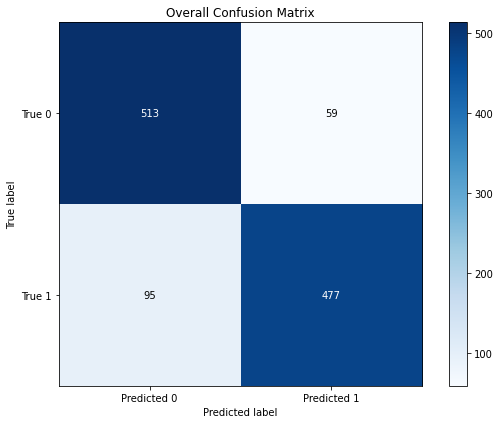

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import matthews_corrcoef
import csv

# Load dataset (adjust path and data loading as per your dataset)
dataset = np.genfromtxt("./Anticancer.csv", delimiter=",", dtype=float)
X = dataset[:, 0:inputSize]  # Adjust inputSize as per your dataset
Y = dataset[:, inputSize:outputCol]  # Adjust outputCol as per your dataset

# Standardize data
std_scale = StandardScaler().fit(X)
X = std_scale.transform(X)

# Define 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True)

# Initialize classifier (SVM)
classifier = SVC(kernel='linear', probability=True)

# Initialize lists to store results
cvscores = []
all_predictions = []
all_true_labels = []

# Iterate over folds
for i, (train, test) in enumerate(cv.split(X, Y)):
    print(f'Fold {i + 1}')

    # Train classifier
    classifier.fit(X[train], Y[train].ravel())

    # Predict on test set
    pred = classifier.predict(X[test])

    # Store predictions and true labels
    all_predictions.extend(pred)
    all_true_labels.extend(Y[test])

    # Calculate confusion matrix metrics
    tp, fn, fp, tn = confusion_matrix(Y[test], pred, labels=[1, 0]).ravel()
    acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
    sp = np.round((tn / (fp + tn)) * 100, 2)
    sn = np.round((tp / (tp + fn)) * 100, 2)
    mcc = np.round(matthews_corrcoef(Y[test].ravel(), pred), 5)

    # Store metrics
    cvscores.append([tp, fp, tn, fn, acc, sp, sn, mcc])

# Compute overall confusion matrix
overall_cm = confusion_matrix(all_true_labels, all_predictions)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
plt.imshow(overall_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Overall Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(all_true_labels)))
plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
plt.yticks(tick_marks, ['True 0', 'True 1'])

# Add text annotations to each cell
thresh = overall_cm.max() / 2.
for i, j in np.ndindex(overall_cm.shape):
    plt.text(j, i, format(overall_cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if overall_cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Save results to CSV file
print('\nResults saved in Cross-Validation-Results.csv')
with open('./Cross-Validation-Results.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['Overall Confusion Matrix'])
    resultwriter.writerow(['True Negative', 'False Positive', 'False Negative', 'True Positive'])
    resultwriter.writerow(overall_cm.ravel())

# Show plot
plt.show()


# Self Consistency with SVM



Self-Consistency
[502, 70, 37, 535, 90.65, 0.9353146853146853, 'Accuracy =', 90.65, 'specificity=', 0.8776223776223776, 'Sensitivity =', 0.9353146853146853, 'Precession =', 0.8842975206611571, 'MCC =', 0.8388503977144525]


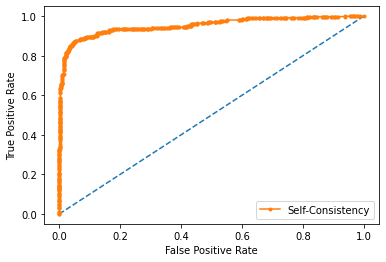

90.65

In [17]:

import matplotlib.pyplot as pyplot
print('\nSelf-Consistency')
#clf = RandomForestClassifier(n_estimators=16, max_depth=40, oob_score=True, n_jobs=-1, warm_start=True).fit(X, Y.ravel())
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1).fit(X, Y.ravel())
clf = SVC(probability=True, kernel='linear').fit(X, Y.ravel())

pred = np.round(clf.predict(X)) # clf
tn, fp, fn, tp = confusion_matrix(Y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sn=(tp/(tp+fn))
sp=(tn/(tn+fp))
prec=(tp/(tp+fp))
mcc=((tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fn)*(tn+fn))))
print([tn, fp, fn, tp, acc, sn, 'Accuracy =', acc, 'specificity=', sp, 'Sensitivity =', sn, 'Precession =', prec, 'MCC =', mcc ])
ns_probs1 = [0 for _ in range(len(Y))]
lr_probs1 = clf.predict_proba(X) # clf
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
ns_fpr1, ns_tpr1, _ = roc_curve(Y, ns_probs1)
lr_fpr1, lr_tpr1, _ = roc_curve(Y, lr_probs1)
# plot the roc curve for the model
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='Self-Consistency')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
acc

# Self consistency CM SVM


Self-Consistency
True Negative: 502, False Positive: 70, False Negative: 37, True Positive: 535
Accuracy: 90.65, Sensitivity: 0.9353146853146853, Specificity: 0.8776223776223776, Precision: 0.8842975206611571, MCC: 0.8388503977144525


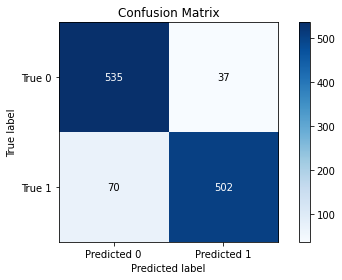

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, matthews_corrcoef
import numpy as np

print('\nSelf-Consistency')
clf = SVC(probability=True, kernel='linear').fit(X, Y.ravel())

pred = np.round(clf.predict(X)) # clf
tn, fp, fn, tp = confusion_matrix(Y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sn = tp / (tp + fn)
sp = tn / (tn + fp)
prec = tp / (tp + fp)
mcc = ((tp * tn - fp * fn) / (math.sqrt((tp + fp) * (tp + fn) * (tn + fn) * (tn + fn))))
print(f'True Negative: {tn}, False Positive: {fp}, False Negative: {fn}, True Positive: {tp}')
print(f'Accuracy: {acc}, Sensitivity: {sn}, Specificity: {sp}, Precision: {prec}, MCC: {mcc}')

# Plot confusion matrix
plt.figure()
cm = confusion_matrix(Y, pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(Y)))
plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
plt.yticks(tick_marks, ['True 0', 'True 1'])

# Add text annotations to each cell
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


# Self consistency with RF


Self-Consistency


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[562, 10, 4, 568, 98.78, 0.993006993006993, 'Accuracy =', 98.78, 'specificity=', 0.9825174825174825, 'Sensitivity =', 0.993006993006993, 'Precession =', 0.9826989619377162, 'MCC =', 0.9807354255986875]


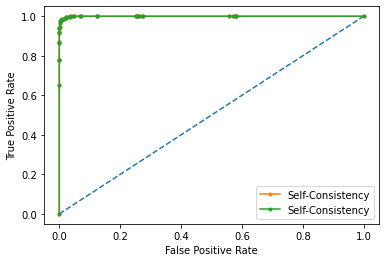

In [30]:
import matplotlib.pyplot as pyplot
print('\nSelf-Consistency')
clf = RandomForestClassifier(n_estimators=16, max_depth=40, oob_score=True, n_jobs=-1, warm_start=True).fit(X, Y.ravel())
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1).fit(X, Y.ravel())
# clf = SVC(probability=True, kernel='linear').fit(X, Y.ravel())

pred = np.round(clf.predict(X)) # clf
tn, fp, fn, tp = confusion_matrix(Y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sn=(tp/(tp+fn))
sp=(tn/(tn+fp))
prec=(tp/(tp+fp))
mcc=((tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fn)*(tn+fn))))
print([tn, fp, fn, tp, acc, sn, 'Accuracy =', acc, 'specificity=', sp, 'Sensitivity =', sn, 'Precession =', prec, 'MCC =', mcc ])
ns_probs1 = [0 for _ in range(len(Y))]
lr_probs1 = clf.predict_proba(X) # clf
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
ns_fpr1, ns_tpr1, _ = roc_curve(Y, ns_probs1)
lr_fpr1, lr_tpr1, _ = roc_curve(Y, lr_probs1)
# plot the roc curve for the model
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='Self-Consistency')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='Self-Consistency')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()

# CM with RF self consistency


Self-Consistency
True Negative: 560, False Positive: 12, False Negative: 3, True Positive: 569
Accuracy: 98.69, Sensitivity: 0.9947552447552448, Specificity: 0.9790209790209791, Precision: 0.9793459552495697, MCC: 0.98165017540999


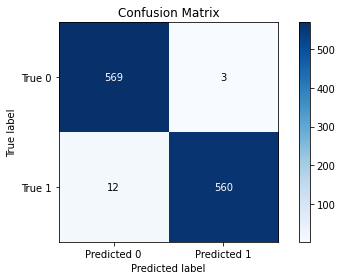

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, matthews_corrcoef
import numpy as np

print('\nSelf-Consistency')
clf = RandomForestClassifier(n_estimators=16, max_depth=40, oob_score=True, n_jobs=-1, warm_start=True).fit(X, Y.ravel())

pred = np.round(clf.predict(X)) # clf
tn, fp, fn, tp = confusion_matrix(Y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sn = tp / (tp + fn)
sp = tn / (tn + fp)
prec = tp / (tp + fp)
mcc = ((tp * tn - fp * fn) / (math.sqrt((tp + fp) * (tp + fn) * (tn + fn) * (tn + fn))))
print(f'True Negative: {tn}, False Positive: {fp}, False Negative: {fn}, True Positive: {tp}')
print(f'Accuracy: {acc}, Sensitivity: {sn}, Specificity: {sp}, Precision: {prec}, MCC: {mcc}')

# Plot confusion matrix
plt.figure()
cm = confusion_matrix(Y, pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(Y)))
plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
plt.yticks(tick_marks, ['True 0', 'True 1'])

# Add text annotations to each cell
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


# JackKnife with RF


Jacknife testing

Jacknife : 1


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


[58, 0, 0, 0, 'Accuracy =', 100.0, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', nan, 'MCC =', nan]

Jacknife : 2


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


[58, 0, 0, 0, 'Accuracy =', 100.0, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', nan, 'MCC =', nan]

Jacknife : 3


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


[55, 3, 0, 0, 'Accuracy =', 94.83, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', 0.0, 'MCC =', nan]

Jacknife : 4


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


[58, 0, 0, 0, 'Accuracy =', 100.0, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', nan, 'MCC =', nan]

Jacknife : 5


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


[54, 3, 0, 0, 'Accuracy =', 94.74, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', 0.0, 'MCC =', nan]

Jacknife : 6


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


[57, 0, 0, 0, 'Accuracy =', 100.0, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', nan, 'MCC =', nan]

Jacknife : 7


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


[57, 0, 0, 0, 'Accuracy =', 100.0, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', nan, 'MCC =', nan]

Jacknife : 8
[18, 1, 0, 38, 'Accuracy =', 98.25, 'Sensitivity =', 1.0, 'specificity=', 1.0, 'Precession =', 1.0, 'MCC =', 1.0]

Jacknife : 9


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars


[0, 0, 1, 56, 'Accuracy =', 98.25, 'Sensitivity =', 1.0, 'specificity=', nan, 'Precession =', 1.0, 'MCC =', 0.0]

Jacknife : 10


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars


[0, 0, 1, 56, 'Accuracy =', 98.25, 'Sensitivity =', 1.0, 'specificity=', nan, 'Precession =', 1.0, 'MCC =', 0.0]

Jacknife : 11


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


[0, 0, 0, 57, 'Accuracy =', 100.0, 'Sensitivity =', 1.0, 'specificity=', nan, 'Precession =', 1.0, 'MCC =', nan]

Jacknife : 12


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


[0, 0, 0, 57, 'Accuracy =', 100.0, 'Sensitivity =', 1.0, 'specificity=', nan, 'Precession =', 1.0, 'MCC =', nan]

Jacknife : 13


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars


[0, 0, 1, 56, 'Accuracy =', 98.25, 'Sensitivity =', 1.0, 'specificity=', nan, 'Precession =', 1.0, 'MCC =', 0.0]

Jacknife : 14


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars


[0, 0, 1, 56, 'Accuracy =', 98.25, 'Sensitivity =', 1.0, 'specificity=', nan, 'Precession =', 1.0, 'MCC =', 0.0]

Jacknife : 15
[15, 0, 0, 42, 'Accuracy =', 100.0, 'Sensitivity =', 1.0, 'specificity=', 1.0, 'Precession =', 1.0, 'MCC =', 1.0]

Jacknife : 16


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


[56, 1, 0, 0, 'Accuracy =', 98.25, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', 0.0, 'MCC =', nan]

Jacknife : 17


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


[57, 0, 0, 0, 'Accuracy =', 100.0, 'Sensitivity =', nan, 'specificity=', 1.0, 'Precession =', nan, 'MCC =', nan]

Jacknife : 18
[19, 2, 0, 36, 'Accuracy =', 96.49, 'Sensitivity =', 1.0, 'specificity=', 1.0, 'Precession =', 1.0, 'MCC =', 1.0]

Jacknife : 19


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


[0, 0, 0, 57, 'Accuracy =', 100.0, 'Sensitivity =', 1.0, 'specificity=', nan, 'Precession =', 1.0, 'MCC =', nan]

Jacknife : 20


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars


[0, 0, 1, 56, 'Accuracy =', 98.25, 'Sensitivity =', 1.0, 'specificity=', nan, 'Precession =', 1.0, 'MCC =', 0.0]

Final Jacknife Score =  98.69


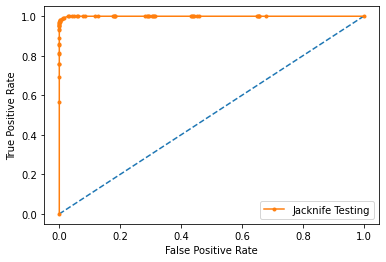

ValueError: Found input variables with inconsistent numbers of samples: [344, 1144]

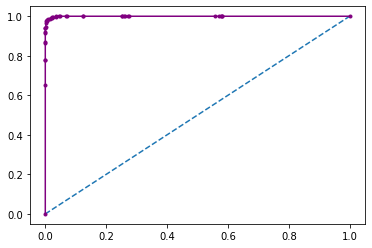

In [34]:
kfold = KFold(n_splits=20, shuffle=False)  # Removed Stratified Keyword for JackKnife
cvscores = []
iterator = 1
cv_score = 0

# Normalization
std_scale = StandardScaler().fit(X)
X = np.array(X, dtype='float64')
#X = std_scale.transform(X)
# pca = decomposition.PCA(n_components=2)
# pca.fit(X)
# X = pca.transform(X)
print('\nJacknife testing')
for train, test in kfold.split(X, Y):
    print('\nJacknife : ' + str(iterator))
    clf = RandomForestClassifier(n_estimators=30, max_depth=25, oob_score=True, n_jobs=-1, warm_start=False).fit(X, Y.ravel())
    #clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1).fit(X, Y.ravel())
    pred = np.round(clf.predict(X[test]))
    tn2, fp2, fn2, tp2 = confusion_matrix(Y[test], pred, labels=[1, 0]).ravel()
    acc2 = np.round(((tn2 + tp2)/ (tn2 + fp2 + fn2 + tp2)) * 100, 2)
    sn2=np.round(tp2/(tp2+fn2))
    sp2=np.round(tn2/(tn2+fp2))
    prec2=np.round(tp2/(tp2+fp2))
    mcc2=np.round((tp2*tn2-fp2*fn2)/(math.sqrt((tp2+fp2)*(tp2+fn2)*(tn2+fn2)*(tn2+fn2))))
    cvscores.append([tn2, fp2, fn2, tp2, acc2, sn2, sp2, prec2, mcc2])
    iterator = iterator + 1
    print([tn2, fp2, fn2, tp2, 'Accuracy =', acc2, 'Sensitivity =', sn2, 'specificity=', sp2, 'Precession =', prec2, 'MCC =', mcc2])
    cv_score = cv_score + acc2
print('\n\rFinal Jacknife Score = ', np.round(cv_score / kfold.n_splits, 2))
with open('./result3.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['\nJacknife'])
    resultwriter.writerow(['True Negative' 'False Positive' 'False Negative' 'True Positive' 'Accuracy'])
    for i in range(cvscores.__len__()):
        resultwriter.writerow(cvscores[i])
    resultwriter.writerow(['The Final Jacknife Score', '', '', '', np.round(cv_score / kfold.n_splits, 2)])

from matplotlib import pyplot

ns_probs1 = [0 for _ in range(len(Y))]
lr_probs1 = clf.predict_proba(X)#clf
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]

# calculate roc curves
ns_fpr4, ns_tpr4, _ = roc_curve(Y, ns_probs1)
lr_fpr4, lr_tpr4, _ = roc_curve(Y, lr_probs1)

# plot the roc curve for the model
pyplot.plot(ns_fpr4, ns_tpr4, linestyle='--')
pyplot.plot(lr_fpr4, lr_tpr4, marker='.', label='Jacknife Testing')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# plot the roc curve for the model
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--', )
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', color='purple', label='Self-Consistency')

# plot the roc curve for the model
ns_fpr2, ns_tpr2, _ = roc_curve(y_test, ns_probs1) # this is needed to be check as I suppose to be true but needed verification
roc_auc = auc(fpr, tpr)
pyplot.plot(ns_fpr2, ns_tpr2, linestyle='--', color='Blue')
pyplot.plot(lr_fpr2, lr_tpr2, linestyle='-', color='Green', label='10-fold Cross Validation')

# plot the roc curve for the model
pyplot.plot(ns_fpr3, ns_tpr3, linestyle='--')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', color='Cyan', label='Independent Testing')

# plot the roc curve for the model
pyplot.plot(ns_fpr4, ns_tpr4, linestyle='--')
pyplot.plot(lr_fpr4, lr_tpr4, marker='.', color='yellow', label='Jacknife Testing')

pyplot.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()

pyplot.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12, bbox=dict(facecolor='red', edgecolor='gray', boxstyle='round,pad=0.5'))



The shape of X is: (1144, 210)
The shape of Y is: (1144, 1)

Fold 1


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


Confusion Matrix:
[[ 0  0]
 [ 5 53]]
Accuracy: 91.38%, Sensitivity: nan, Specificity: 0.91, Precision: 0.00, MCC: nan

Fold 2


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


Confusion Matrix:
[[ 0  0]
 [ 6 52]]
Accuracy: 89.66%, Sensitivity: nan, Specificity: 0.90, Precision: 0.00, MCC: nan

Fold 3


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


Confusion Matrix:
[[ 0  0]
 [ 9 49]]
Accuracy: 84.48%, Sensitivity: nan, Specificity: 0.84, Precision: 0.00, MCC: nan

Fold 4


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


Confusion Matrix:
[[ 0  0]
 [ 7 51]]
Accuracy: 87.93%, Sensitivity: nan, Specificity: 0.88, Precision: 0.00, MCC: nan

Fold 5


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


Confusion Matrix:
[[ 0  0]
 [38 19]]
Accuracy: 33.33%, Sensitivity: nan, Specificity: 0.33, Precision: 0.00, MCC: nan

Fold 6


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


Confusion Matrix:
[[57]]
Accuracy: 100.00%, Sensitivity: nan, Specificity: 1.00, Precision: nan, MCC: nan

Fold 7


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


Confusion Matrix:
[[57]]
Accuracy: 100.00%, Sensitivity: nan, Specificity: 1.00, Precision: nan, MCC: nan

Fold 8
Confusion Matrix:
[[37  1]
 [ 2 17]]
Accuracy: 94.74%, Sensitivity: 0.97, Specificity: 0.89, Precision: 0.95, MCC: 0.66

Fold 9


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


Confusion Matrix:
[[48  9]
 [ 0  0]]
Accuracy: 84.21%, Sensitivity: 0.84, Specificity: nan, Precision: 1.00, MCC: nan

Fold 10


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


Confusion Matrix:
[[51  6]
 [ 0  0]]
Accuracy: 89.47%, Sensitivity: 0.89, Specificity: nan, Precision: 1.00, MCC: nan

Fold 11


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


Confusion Matrix:
[[54  3]
 [ 0  0]]
Accuracy: 94.74%, Sensitivity: 0.95, Specificity: nan, Precision: 1.00, MCC: nan

Fold 12


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


Confusion Matrix:
[[57]]
Accuracy: 100.00%, Sensitivity: 1.00, Specificity: nan, Precision: 1.00, MCC: nan

Fold 13


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


Confusion Matrix:
[[56  1]
 [ 0  0]]
Accuracy: 98.25%, Sensitivity: 0.98, Specificity: nan, Precision: 1.00, MCC: nan

Fold 14


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


Confusion Matrix:
[[40 17]
 [ 0  0]]
Accuracy: 70.18%, Sensitivity: 0.70, Specificity: nan, Precision: 1.00, MCC: nan

Fold 15
Confusion Matrix:
[[32 10]
 [ 1 14]]
Accuracy: 80.70%, Sensitivity: 0.76, Specificity: 0.93, Precision: 0.97, MCC: 0.45

Fold 16


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


Confusion Matrix:
[[ 0  0]
 [ 1 56]]
Accuracy: 98.25%, Sensitivity: nan, Specificity: 0.98, Precision: 0.00, MCC: nan

Fold 17


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


Confusion Matrix:
[[ 0  0]
 [ 2 55]]
Accuracy: 96.49%, Sensitivity: nan, Specificity: 0.96, Precision: 0.00, MCC: nan

Fold 18
Confusion Matrix:
[[36  0]
 [ 7 14]]
Accuracy: 87.72%, Sensitivity: 1.00, Specificity: 0.67, Precision: 0.84, MCC: 0.65

Fold 19


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


Confusion Matrix:
[[57]]
Accuracy: 100.00%, Sensitivity: 1.00, Specificity: nan, Precision: 1.00, MCC: nan

Fold 20


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


Confusion Matrix:
[[53  4]
 [ 0  0]]
Accuracy: 92.98%, Sensitivity: 0.93, Specificity: nan, Precision: 1.00, MCC: nan

Average Accuracy across 20 folds: 88.73%


c:\Users\Shazia Khan\anaconda3\envs\golf\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


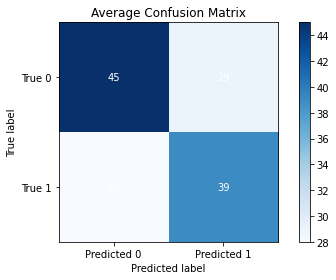

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

random_state = np.random.RandomState(5)
inputSize = 210
outputCol = inputSize + 1


# Standardize data
std_scale = StandardScaler().fit(X)
X = std_scale.transform(X)

# Print shapes of X and Y
shape_X = X.shape
shape_Y = Y.shape
print('The shape of X is: ' + str(shape_X))
print('The shape of Y is: ' + str(shape_Y))

kfold = KFold(n_splits=20, shuffle=False)  # Removed Stratified Keyword for JackKnife
cvscores = []
iterator = 1
cv_score = 0
for train, test in kfold.split(X, Y):
    print(f'\nFold {iterator}')
    X_train, X_test = X[train], X[test]
    y_train, y_test = Y[train], Y[test]

    # Initialize and fit classifier
    clf = RandomForestClassifier(n_estimators=30, max_depth=25, oob_score=True, n_jobs=-1, warm_start=False)
    clf.fit(X_train, y_train.ravel())

    # Predict on test set
    pred = clf.predict(X_test)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, pred, labels=[1, 0]).ravel()
    acc = ((tn + tp) / (tn + fp + fn + tp)) * 100
    sn = tp / (tp + fn)
    sp = tn / (tn + fp)
    prec = tp / (tp + fp)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fn) * (tn + tn))

    # Print metrics for the fold
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, pred)}')
    print(f'Accuracy: {acc:.2f}%, Sensitivity: {sn:.2f}, Specificity: {sp:.2f}, Precision: {prec:.2f}, MCC: {mcc:.2f}')

    # Store scores
    cvscores.append([tn, fp, fn, tp, acc, sn, sp, prec, mcc])
    iterator += 1

# Calculate average scores across all folds
avg_scores = np.mean(cvscores, axis=0)
avg_acc = np.mean([score[4] for score in cvscores])

# Print average scores
print(f'\nAverage Accuracy across {kfold.n_splits} folds: {avg_acc:.2f}%')

# Plot average confusion matrix
plt.figure()
avg_cm = np.mean([confusion_matrix(Y[test], clf.predict(X[test])) for train, test in kfold.split(X, Y)], axis=0)
plt.imshow(avg_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Average Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(Y)))
plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
plt.yticks(tick_marks, ['True 0', 'True 1'])

# Add text annotations to each cell
thresh = avg_cm.max() / 2.
for i, j in np.ndindex(avg_cm.shape):
    plt.text(j, i, format(avg_cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if avg_cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()



k-fold Cross-Validation
The shape of X is: (1144, 210)
The shape of Y is: (1144, 1)

Fold 1
Confusion Matrix:
[[34  3]
 [ 7 14]]
Accuracy: 82.76%, Sensitivity: 0.92, Specificity: 0.67, Precision: 0.83, MCC: 0.69

Fold 2
Confusion Matrix:
[[29  1]
 [ 5 23]]
Accuracy: 89.66%, Sensitivity: 0.97, Specificity: 0.82, Precision: 0.85, MCC: 0.86

Fold 3
Confusion Matrix:
[[28  4]
 [ 1 25]]
Accuracy: 91.38%, Sensitivity: 0.88, Specificity: 0.96, Precision: 0.97, MCC: 0.79

Fold 4
Confusion Matrix:
[[34  1]
 [ 6 17]]
Accuracy: 87.93%, Sensitivity: 0.97, Specificity: 0.74, Precision: 0.85, MCC: 0.85

Fold 5
Confusion Matrix:
[[25  2]
 [ 5 25]]
Accuracy: 87.72%, Sensitivity: 0.93, Specificity: 0.83, Precision: 0.83, MCC: 0.80

Fold 6
Confusion Matrix:
[[35  2]
 [ 0 20]]
Accuracy: 96.49%, Sensitivity: 0.95, Specificity: 1.00, Precision: 1.00, MCC: 0.88

Fold 7
Confusion Matrix:
[[24  8]
 [ 2 23]]
Accuracy: 82.46%, Sensitivity: 0.75, Specificity: 0.92, Precision: 0.92, MCC: 0.60

Fold 8
Confusion M

ValueError: Unknown format code 'd' for object of type 'float'

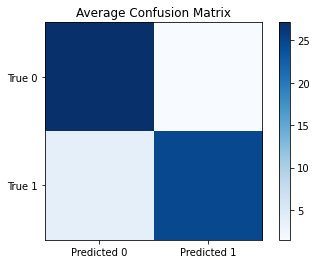

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

random_state = np.random.RandomState(5)
inputSize = 210
outputCol = inputSize + 1

# 10 Fold Part
print('\nk-fold Cross-Validation')
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
dataset = np.genfromtxt("./Anticancer.csv", delimiter=",", dtype=float)
X = dataset[:, 0:inputSize]
Y = dataset[:, inputSize:outputCol]

# Standardize data
std_scale = StandardScaler().fit(X)
X = std_scale.transform(X)

# Print shapes of X and Y
shape_X = X.shape
shape_Y = Y.shape
print('The shape of X is: ' + str(shape_X))
print('The shape of Y is: ' + str(shape_Y))

cvscores = []

# Perform k-fold Cross-Validation
kfold = KFold(n_splits=20, shuffle=True, random_state=random_state)
iterator = 1
for train, test in kfold.split(X, Y):
    print(f'\nFold {iterator}')
    X_train, X_test = X[train], X[test]
    y_train, y_test = Y[train], Y[test]

    # Initialize and fit classifier
    clf = SVC(probability=True, kernel='linear')
    clf.fit(X_train, y_train.ravel())

    # Predict on test set
    pred = clf.predict(X_test)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, pred, labels=[1, 0]).ravel()
    acc = ((tn + tp)/ (tn + fp + fn + tp)) * 100
    sn = tp / (tp + fn)
    sp = tn / (tn + fp)
    prec = tp / (tp + fp)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fn) * (tn + fn))

    # Print metrics for the fold
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, pred)}')
    print(f'Accuracy: {acc:.2f}%, Sensitivity: {sn:.2f}, Specificity: {sp:.2f}, Precision: {prec:.2f}, MCC: {mcc:.2f}')

    # Store scores
    cvscores.append([tn, fp, fn, tp, acc, sn, sp, prec, mcc])
    iterator += 1

# Calculate average scores across all folds
avg_scores = np.mean(cvscores, axis=0)
avg_acc = np.mean([score[4] for score in cvscores])

# Print average scores
print(f'\nAverage Accuracy across {kfold.n_splits} folds: {avg_acc:.2f}%')

# Plot average confusion matrix
plt.figure()
avg_cm = np.mean([confusion_matrix(Y[test], clf.predict(X[test])) for train, test in kfold.split(X, Y)], axis=0)
plt.imshow(avg_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Average Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(Y)))
plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
plt.yticks(tick_marks, ['True 0', 'True 1'])

# Add text annotations to each cell
thresh = avg_cm.max() / 2.
for i, j in np.ndindex(avg_cm.shape):
    plt.text(j, i, format(avg_cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if avg_cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()
